# Materi Pertemuan 15: Integrasi Python-PostgreSQL dan Visualisasi Data

Pada pertemuan ini, kita akan membahas dua skenario utama yang mengintegrasikan  PostgreSQL, dan Python untuk manipulasi data serta visualisasinya.

- Skenario 1: Data dari Pandas DataFrame ke PostgreSQL kemudian di visuliasasikan di Python
- Skenario 2: Data dari SQL Python ke PostgreSQL kemudian di visuliasasikan di Python

## Skenario 1:

**Install dan Import Library**

In [ ]:
# Install psycopg2 jika belum terinstall
!pip install psycopg2 pandas sqlalchemy matplotlib seaborn


In [1]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


Kita menggunakan library psycopg2 untuk koneksi PostgreSQL, pandas untuk manipulasi data, dan sqlalchemy untuk mengintegrasikan SQL dengan Python. matplotlib dan seaborn digunakan untuk visualisasi data.

**2. Membuat Koneksi ke PostgreSQL**

In [7]:
import psycopg2
from psycopg2 import sql

# Detail koneksi ke PostgreSQL
USER = "postgres"
PASSWORD = "1234"
HOST = "localhost"
PORT = "5432"
DATABASE_NAME = "toko_barang"

# Membuat koneksi awal ke PostgreSQL (tanpa menentukan database)
try:
    conn = psycopg2.connect(
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT,
        database="postgres"  # Koneksi ke database default
    )
    conn.autocommit = True  # Dibutuhkan untuk eksekusi perintah CREATE DATABASE
    cursor = conn.cursor()
    print("Koneksi ke PostgreSQL berhasil.")
    
    # Memeriksa apakah database sudah ada
    cursor.execute(sql.SQL("SELECT 1 FROM pg_database WHERE datname = %s"), [DATABASE_NAME])
    exists = cursor.fetchone()

    if not exists:
        # Membuat database jika belum ada
        cursor.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier(DATABASE_NAME)))
        print(f"Database '{DATABASE_NAME}' berhasil dibuat.")
    else:
        print(f"Database '{DATABASE_NAME}' sudah ada.")
    
    cursor.close()
    conn.close()

except Exception as e:
    print(f"Terjadi kesalahan: {e}")


Koneksi ke PostgreSQL berhasil.
Database 'toko_barang' berhasil dibuat.


In [10]:
from sqlalchemy import create_engine

engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")
conn = engine.connect()
print("Koneksi berhasil ke database yang baru dibuat!")


Koneksi berhasil ke database yang baru dibuat!


**3. Membuat DataFrame dan Memasukkan ke PostgreSQL**

In [4]:
# Membuat DataFrame
data = {
    "Product_ID": [101, 102, 103, 104],
    "Product_Name": ["Keyboard", "Mouse", "Monitor", "CPU"],
    "Price": [500000, 200000, 1500000, 2500000],
    "Stock": [50, 150, 30, 20]
}
df = pd.DataFrame(data)
print(df)


   Product_ID Product_Name    Price  Stock
0         101     Keyboard   500000     50
1         102        Mouse   200000    150
2         103      Monitor  1500000     30
3         104          CPU  2500000     20


In [11]:
# Memasukkan data ke PostgreSQL
table_name = "product_data"
df.to_sql(table_name, engine, if_exists="replace", index=False)
print(f"Data dimasukkan ke tabel {table_name}")


Data dimasukkan ke tabel product_data


**4. Query Data di PostgreSQL dan Visualisasi**

In [12]:
# Membaca data dari PostgreSQL
query = f"SELECT * FROM {table_name}"
df_from_db = pd.read_sql(query, conn)
print(df_from_db)


   Product_ID Product_Name    Price  Stock
0         101     Keyboard   500000     50
1         102        Mouse   200000    150
2         103      Monitor  1500000     30
3         104          CPU  2500000     20


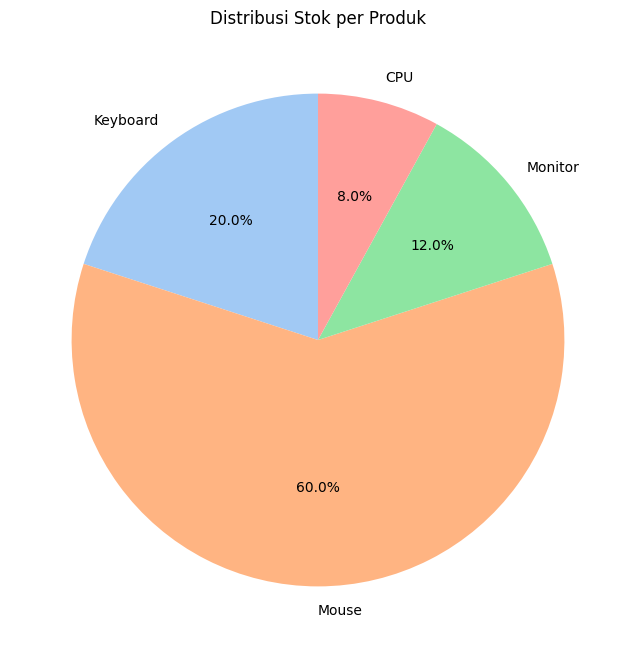

In [14]:
# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(
    df_from_db["Stock"], 
    labels=df_from_db["Product_Name"], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel")
)

plt.title("Distribusi Stok per Produk")
plt.show()

## Skenario 2

Membuat Database, Tabel, dan Memasukkan Data

In [15]:
# Koneksi ke PostgreSQL untuk eksekusi manual
conn_raw = psycopg2.connect(
    dbname=DATABASE, user=USER, password=PASSWORD, host=HOST, port=PORT
)
cursor = conn_raw.cursor()

# Membuat tabel
create_table_query = """
CREATE TABLE IF NOT EXISTS software_store (
    Store_ID SERIAL PRIMARY KEY,
    Store_Name VARCHAR(50),
    Location VARCHAR(100),
    Sales INT
);
"""
cursor.execute(create_table_query)

# Memasukkan data
insert_query = """
INSERT INTO software_store (Store_Name, Location, Sales) VALUES
('TechMart', 'Jakarta', 120),
('SoftSolutions', 'Bandung', 80),
('CompuWorld', 'Surabaya', 100)
ON CONFLICT DO NOTHING;
"""
cursor.execute(insert_query)
conn_raw.commit()
print("Data berhasil dimasukkan!")


Data berhasil dimasukkan!


**2. Membaca Data sebagai Pandas DataFrame**

In [16]:
# Membaca data ke Pandas DataFrame
query_store = "SELECT * FROM software_store"
df_store = pd.read_sql(query_store, conn)
print(df_store)


   store_id     store_name  location  sales
0         1       TechMart   Jakarta    120
1         2  SoftSolutions   Bandung     80
2         3     CompuWorld  Surabaya    100


**3. Visualisasi**

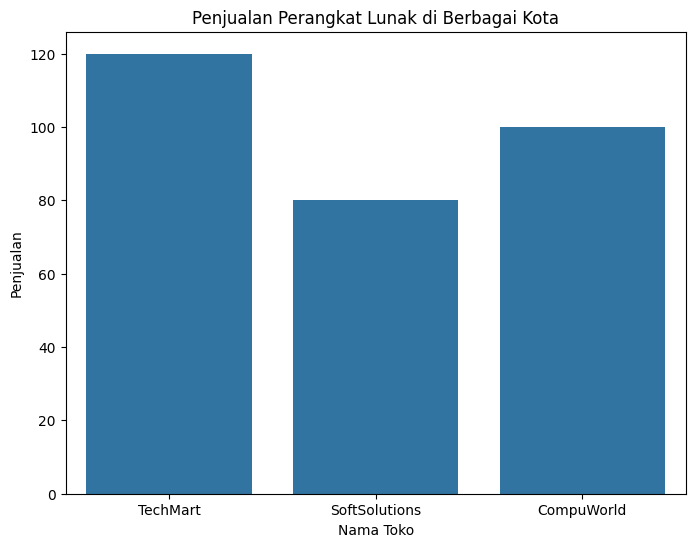

In [18]:
# Visualisasi dengan matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x="store_name", y="sales", data=df_store)
plt.title("Penjualan Perangkat Lunak di Berbagai Kota")
plt.xlabel("Nama Toko")
plt.ylabel("Penjualan")
plt.show()
